<h1 align="center">기말고사 대체 과제</h1>
<h3 align="end"> 수학과 201700255 강민정 </h3>

- 영화 : **삼진그룹 영어토익반, 2020**
- 📁 파일 구성
    - movie_review_analysis.ipynb
    - 리뷰_점수png
    - 리뷰_텍스트.png
    - 페이지_링크.png
    - 보고서이미지 폴더 : 보고서에서 사용한 이미지들이 들어 있습니다.

In [1]:
# 필요한 모듈 .mport

import pandas as pd
import numpy as np

from bs4 import BeautifulSoup
from urllib.request import urlopen
import urllib
import time

import matplotlib.pyplot as plt

# 영화 리뷰 데이터 가져오기 

url 은 수업시간에 언급해주신 것 처럼 버튼이 link가 각각 페이지로 넘어 갈 수 있도록 구성되어 있음을 확인하였습니다.

<img src="./페이지_링크.png" width="700"/>

 ▶ 끝에 페이지 번호만 바뀌는 것을 확인하였습니다.

In [2]:
# 네이버 영화 리뷰 url

link = "https://movie.naver.com/movie/bi/mi/pointWriteFormList.nhn?code=189141&type=after&onlyActualPointYn=N&onlySpoilerPointYn=N&order=sympathyScore&page="
page = str(1)
url = link + page
html = urlopen(url)

soup = BeautifulSoup(html.read(), "html.parser")

### 네이버 영화 리뷰 개발자 도구로 html 구성 알아보기
<br/>

<img src="./보고서이미지/리뷰_텍스트_ 개발자도구.png" alt="리뷰_텍스트_개발자도구" width="600"/>

▶ 리뷰 텍스트(멘트) 는 span 태그, id 는 _filtered_ment_0 로 이루어져 있습니다.

    - 다음 텍스트의 id 는 _filtered_ment_1 입니다.
    - 이를 통해"_filtered_ment_"+num   for num in range(0,10) 로 찾아 내야 한다는 것을 확인하였습니다.
    - 텍스트 앞 뒤로 공백이 많아 strip()도 해주어야 합니다.

<br/>

<img src="./보고서이미지/리뷰_점수_개발자도구.png" alt="리뷰_점수_개발자도구" width="600"/>

▶ 리뷰 점수(평점) 는 div 태그에 class = "star_score" 안에 em 태그로 감싸져 있었습니다.

    - 다음 리뷰도 class가 같습니다.
    - 이를 통해 find_all()으로 모든 star_score을 꺼낸 다음 em 태그 안의 텍스트를 찾아내는 과정을 거쳐야 한다는 것을 확인하였습니다.



**다음은 첫페이지의 평점과 리뷰 멘트를 가져와 차례로 출력하여 확인하고 이어 1000개의 리뷰데이터를 가져왔습니다.**

In [3]:
# 첫 페이지의 리뷰 ment, 평점 가져오기

ment_1p = []
score_1p =[]

for ment_num in range(10):
    ment = soup.find("span", {"id": "_filtered_ment_"+str(ment_num)})
    ment_1p.append(ment.text.strip())

star_score  = soup.find_all("div", {"class": "star_score"})
for i in range(10):
    score_1p.append(star_score[i].find("em").text)
    
for m,s in zip(ment_1p, score_1p):
    print(s,"\t",m)

10 	 어제의 너 보다 오늘 더 성장했는데~? ㅋㅋ 명대사! 너무재밌었어요!! +_+ 기대이상이었습니다~
10 	 2020년 본 영화중에 가장 기분 좋게 본 영화같아요
10 	 근래 본 영화 중 최고! 박혜수 진짜 너무 귀여워ㅜㅜ
10 	 억지신파 내용 아니라서 더 맘에 들어요 배우들 케미 좋네요ㅎㅎ
10 	 정의로운 세상을 꿈꾸게 되는 영화였습니다 좋아요ㅎㅎ
9 	 사회적으로 시사하는바가 좋습니다. 꼭 한번 보시기를강추합니다.
10 	 다들 어찌 95년생 직장인 연기가 이리 찰떡이란말이오 ㅋㅋ
10 	 추억의 노래와 갬성! 이 정도로 재밌을줄 몰랐는데 너무 재밌게 봤다!
10 	 고아성은 여기서도 폐수를 ㅎㅎ
10 	 진짜 기대안햇는데 재밌어..


In [4]:
# 1000개의 리뷰 데이터 가져오기

from tqdm.notebook import tqdm

ment_list = []
score_list =[]

for i in tqdm(range(1, 101)):
    try:
        link = "https://movie.naver.com/movie/bi/mi/pointWriteFormList.nhn?code=189141&type=after&onlyActualPointYn=N&onlySpoilerPointYn=N&order=sympathyScore&page="
        url = link + str(i)
        
        html = urlopen(url)
        soup = BeautifulSoup(html.read(), "html.parser")

        for ment_num in range(10):
            ment = soup.find("span", {"id": "_filtered_ment_"+str(ment_num)})
            ment_list.append(ment.text.strip())
        
        star_score  = soup.find_all("div", {"class": "star_score"})
        for i in range(10):
            score_list.append(star_score[i].find("em").text)

        time.sleep(0.4)
    except:
        continue
    
print(len(ment_list),len(score_list))


1000 1000


### 긍정, 중립, 부정 데이터 분류하기
- NSMC 에서 사용한 리뷰 분류 기준과 동일하게 다음과 같이 분류
    - 1~4 : 부정
    - 5~8 : 중립
    - 9~10 : 긍정

In [5]:
neg_ment_list = []
neg_score_list = []
pos_ment_list = []
pos_score_list = []
neutral_ment_list = []
neutral_score_list = []

for i in range(1000):
    s = int(score_list[i])
    m = ment_list[i]
    if s > 8:
        pos_ment_list.append(m)
        pos_score_list.append(s)
    elif s > 4:
        neutral_ment_list.append(m)
        neutral_score_list.append(s)
    else:
        neg_ment_list.append(m)
        neg_score_list.append(s)
        
print("부정 : {}  긍정 : {}  중립 : {}".format(len(neg_score_list),len(pos_score_list),len(neutral_score_list)))

# 각 리스트의 첫번쨰(인덱스0) 문장 확인
print(neg_ment_list[0])
print(pos_ment_list[0])
print(neutral_ment_list[0])

부정 : 458  긍정 : 404  중립 : 138
평점보고 기대했었는데 정말 실망이에요   ㅠㅠ
어제의 너 보다 오늘 더 성장했는데~? ㅋㅋ 명대사! 너무재밌었어요!! +_+ 기대이상이었습니다~
평점보고 본건데 저는 개인적으로 엄청 재밋진않았어요 ㅠㅠㅠ


# 워드클라우드 그리기

- 긍정, 중립, 부정 데이터에 대한 워드 클라우드 각각 그리기
- '돈'과 같이 1글자 이지만 의미 있는 단어들이 있기 때문에 가장 많이 나온 명사 20개 씩 추출한 후 의미가 없는 토큰 제거

In [6]:
from konlpy.tag import Okt
okt = Okt()

In [7]:
# 부정
neg_ment = '\n'.join(neg_ment_list)
print(neg_ment[:50])

# 중립
neutral_ment = '\n'.join(neutral_ment_list)
print(neutral_ment[:50])

# 긍정
pos_ment = '\n'.join(pos_ment_list)
print(pos_ment[:50])

평점보고 기대했었는데 정말 실망이에요   ㅠㅠ
하... 1도 재미없고 오그라드는 영화.. 
평점보고 본건데 저는 개인적으로 엄청 재밋진않았어요 ㅠㅠㅠ
생각보가 재밋었지만 뭔가 결말부
어제의 너 보다 오늘 더 성장했는데~? ㅋㅋ 명대사! 너무재밌었어요!! +_+ 기대이상이었


In [8]:
# okt.nouns 로 명사만 추출

from collections import Counter

neg_ment_noun = okt.nouns(neg_ment)
neg_noun = Counter(neg_ment_noun)

neutral_ment_noun = okt.nouns(neutral_ment)
neutral_noun = Counter(neutral_ment_noun)

pos_ment_noun = okt.nouns(pos_ment)
pos_noun = Counter(pos_ment_noun)

In [9]:
# neg list 에서 추출한 명사 중 빈도수가 높은 20개

neg_noun.most_common(20)

[('영화', 238),
 ('평점', 122),
 ('진짜', 51),
 ('점', 48),
 ('돈', 47),
 ('스토리', 45),
 ('이', 41),
 ('알바', 40),
 ('노잼', 35),
 ('시간', 34),
 ('감동', 28),
 ('재미', 28),
 ('왜', 27),
 ('그냥', 27),
 ('억지', 26),
 ('페미', 26),
 ('정말', 25),
 ('내용', 24),
 ('보고', 23),
 ('연기', 22)]

In [10]:
# pos list 에서 추출한 명사 중 빈도수가 높은 20개

pos_noun.most_common(20)

[('영화', 193),
 ('배우', 71),
 ('연기', 67),
 ('생각', 45),
 ('스토리', 35),
 ('진짜', 33),
 ('감동', 32),
 ('더', 29),
 ('최고', 29),
 ('재미', 29),
 ('고아성', 25),
 ('만', 25),
 ('이솜', 24),
 ('보고', 23),
 ('정말', 21),
 ('것', 21),
 ('사람', 18),
 ('기분', 17),
 ('박혜수', 17),
 ('연출', 17)]

In [11]:
# neutral list 에서 추출한 명사 중 빈도수가 높은 20개

neutral_noun.most_common(20)

[('영화', 62),
 ('평점', 26),
 ('볼', 19),
 ('스토리', 19),
 ('연기', 17),
 ('점', 15),
 ('좀', 13),
 ('보고', 12),
 ('생각', 12),
 ('그냥', 10),
 ('정도', 10),
 ('배우', 10),
 ('느낌', 9),
 ('저', 8),
 ('결말', 8),
 ('기대', 8),
 ('것', 7),
 ('이솜', 6),
 ('감동', 6),
 ('중간', 6)]

In [12]:
# stopword 제거하기

# 가장 많이 나오는 단어 중에서 제거할 단어 선정
stopword_list = ['영화','이','점','것','수'] # 많이 나오는 의미가 없는 1글자 단어와 '영화' 제거

for stopword in stopword_list:
    if stopword in pos_noun:
        pos_noun.pop(stopword)
    if stopword in neutral_noun:
        neutral_noun.pop(stopword)
    if stopword in neg_noun:
        neg_noun.pop(stopword)

In [13]:
# 워드 클라우드
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image

# 사진 가져오기
img = Image.open('movie_img.png').convert("RGBA")
img_mask = Image.new("RGB", img.size, (255,255,255))
img_mask.paste(img,img)
img_mask = np.array(img_mask)

# mask와 글꼴 설정
wc_noun = WordCloud(background_color='white', max_words=2000,
                     font_path=r'C:\Windows\Fonts\NanumGothic.ttf',mask = img_mask)

In [14]:
# palettable 모듈 install
!pip install palettable

### 📌 사진 가져오기

- 단순한 이미지임에도 인식을 하지 못하여 원하는 이미지가 마스크에 그려지지 않았다.
- 아래의 [참고]를 참고하여 먼저 (255,255,255), 즉 흰색으로 img_mask를 가져온 이미지 사이즈 만큼 만들고 가져온 이미지를 붙여넣기(paste)하였다. 그리고 나서 이를 nparray 로 만들었다.


### 📌 워드 클라우드 색 입히기

- 위의 참고 사이트를 보고 긍정과 부정을 대조되는 색으로 바꾸면 좋을 것 같다는 생각이 들었습니다.
- Palettable 은 Python 용 색상 팔레트 라이브러리입니다. 
- palettable 모듈을 설치 하고 적절한 색을 찾아 이용하였다.
    - https://jiffyclub.github.io/palettable/
- 해당 사이트에서 원하는 색상의 팔레트를 찾은 후 가져온다.
- 참고[2]에서 color_func 를 작성한 것을 참고하여 워드클라우드.recolor 를 해준다.
    - 긍정 : https://jiffyclub.github.io/palettable/colorbrewer/sequential/#gnbu_9
    - 부정 : https://jiffyclub.github.io/palettable/colorbrewer/sequential/#Reds_9
    - 중립 : 워드 클라우드의 기본 색상 사용


**[참고]**

[1] https://github.com/kimyoungjin06/wordcloud

[2] https://github.com/minimaxir/stylistic-word-clouds/blob/master/wordcloud_yelp_neg.py


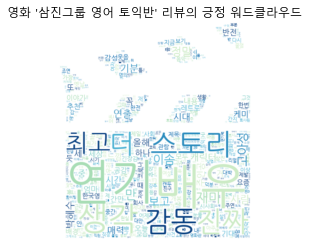

In [15]:
# 긍정 워드 클라우드 그리기

from palettable.colorbrewer.sequential import GnBu_9
import random

def color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return tuple(GnBu_9.colors[random.randint(2,8)])

wc_noun = wc_noun.generate_from_frequencies(pos_noun)

plt.rc('font', family = 'Malgun Gothic') 
plt.title("영화 '삼진그룹 영어 토익반' 리뷰의 긍정 워드클라우드")

wc_noun.recolor(color_func=color_func, random_state=3)
plt.imshow(wc_noun, interpolation="bilinear")
plt.axis("off")
plt.show()

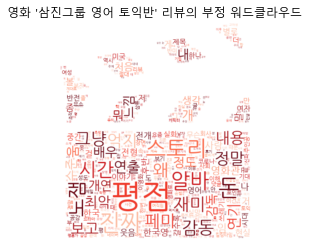

In [16]:
# 부정 워드 클라우드 그리기

from palettable.colorbrewer.sequential import Reds_9

def color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return tuple(Reds_9.colors[random.randint(2,8)])

wc_noun = wc_noun.generate_from_frequencies(neg_noun)

plt.rc('font', family = 'Malgun Gothic')
plt.title("영화 '삼진그룹 영어 토익반' 리뷰의 부정 워드클라우드")

wc_noun.recolor(color_func=color_func, random_state=3)
plt.imshow(wc_noun, interpolation="bilinear")
plt.axis("off")
plt.show()

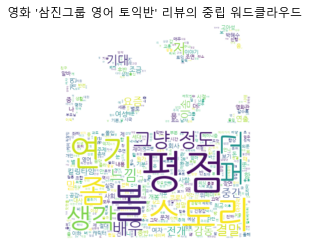

In [17]:
# 중립 워드 클라우드 그리기

wc_noun = wc_noun.generate_from_frequencies(neutral_noun)

plt.rc('font', family = 'Malgun Gothic')
plt.title("영화 '삼진그룹 영어 토익반' 리뷰의 중립 워드클라우드")

plt.imshow(wc_noun, interpolation="bilinear")
plt.axis("off")
plt.show()

# 나이브 베이즈 분류기 학습시키기

- <영화 데이터 가져오기> 에서 가져온 긍정, 부정 데이터로 나이브 베이즈 분류기를 학습시키고, test 문장들을 입력함으로서 결과를 확인해보겠습니다.
- 앞에서 분류해 놓은 pos_ment_list 와 neg_ment_list 를 사용합니다.

In [18]:
# 데이터 튜플로 묶어주기

pos_train = [(ment , "pos") for ment in pos_ment_list]
neg_train = [(ment , "neg") for ment in neg_ment_list]

train = pos_train + neg_train

print(train[:10],train[-10:])

[('어제의 너 보다 오늘 더 성장했는데~? ㅋㅋ 명대사! 너무재밌었어요!! +_+ 기대이상이었습니다~', 'pos'), ('2020년 본 영화중에 가장 기분 좋게 본 영화같아요', 'pos'), ('근래 본 영화 중 최고! 박혜수 진짜 너무 귀여워ㅜㅜ', 'pos'), ('억지신파 내용 아니라서 더 맘에 들어요 배우들 케미 좋네요ㅎㅎ', 'pos'), ('정의로운 세상을 꿈꾸게 되는 영화였습니다 좋아요ㅎㅎ', 'pos'), ('사회적으로 시사하는바가 좋습니다. 꼭 한번 보시기를강추합니다.', 'pos'), ('다들 어찌 95년생 직장인 연기가 이리 찰떡이란말이오 ㅋㅋ', 'pos'), ('추억의 노래와 갬성! 이 정도로 재밌을줄 몰랐는데 너무 재밌게 봤다!', 'pos'), ('고아성은 여기서도 폐수를 ㅎㅎ', 'pos'), ('진짜 기대안햇는데 재밌어..', 'pos')] [('Si bal 평론가랑 관람객새끼들 전부 돈받아쳐먹었나...평점뭔데? 나만 다른영화를 봤냐?? 세얼간이 보헤미안랩소디 이런영화에 5점 6점주던평론가들 여기는 왜 7점인데?? 나만이해가안가??? 내가 미친놈인가? 니들이...', 'neg'), ('저능아 열등감 덩어리 페미만 빨아줄만한 영화. 유치함 그 자체', 'neg'), ('노잼. 그리고 남자배우들 다 별로...ㅠㅠ', 'neg'), ('니네 진짜 이게 재밋어서 평점을 이렇게 매긴거냐?', 'neg'), ('아..평점에 낚였다진짜 계속 하품하면서봄긴장감이고 웃음요소 1도 없음', 'neg'), ('영화 제목과 다른 영화 뻔한 스토리공감되지 않는 내용걸캅스를 약간 고급(?)화 한 느낌', 'neg'), ('취지는 좋았으나 딱 그뿐', 'neg'), ('후반부에 너어어어어무 힘빠지더라. 끝까지 신경썻으면 써니 급이었을텐데....', 'neg'), ('주연들의 토익점수가 기대되네요.', 'neg'), ("영화의 기-승-전-결 마다 '어떻게 이렇게 못만들 수 있지?'라고 생각하면서 봤습니다. 이것 저것 담고싶은 주제는 많은데 깊이는 없고 

In [19]:
# 필요한 모듈 불러오기

from nltk.tokenize import word_tokenize
import nltk

from konlpy.tag import Okt
okt = Okt()

### 함수로 작성

- pos_tokenize
    - 문장을 형태소 단위로 분리해주는 함수

- make_word_dict
    - 모든 단어를 모아 집합으로 만드는 함수
    - 의미 없는 단어인 조사는 제거

- make_train_feats
    - 각 문장마다 단어가 있는지 없는지 여부로 표현해주는 함수 

In [20]:
def pos_tokenize(raw_sent):
    pos_sent = []    
    sent = okt.pos(raw_sent, norm=True, stem=True)    
    
    for tup in sent:        
        word, tag = tup[0], tup[1]
        word_tag = word + '/' + tag
        pos_sent.append(word_tag)
    
    return ' '.join(pos_sent)   # 단어 / 품사 리턴
 

def make_word_dict(train, use_morph=False):
    all_words = set()

    for tup in train:
        sent, label = tup[0], tup[1]
        if use_morph:
            sent = pos_tokenize(sent)
        words = word_tokenize(sent)
        for word in words:
            if 'Josa' in word:   # 조사 제외
                # print(word)
                continue
            all_words.add(word)

    return all_words  # 모든 단어 모은 집합 리턴


def make_train_feats(train, all_words, use_morph=False):
    train_features = []

    for tup in train:
        sent, label = tup[0], tup[1]
        if use_morph:
            sent = pos_tokenize(sent)
        words = word_tokenize(sent)
        tmp = {set_word: (set_word in words) for set_word in all_words}
        sent_tup = (tmp, label)
        train_features.append(sent_tup)
    
    return train_features   # 문장마다 단어가 있는지 표시 리턴

In [21]:
use_morph = True
all_words = make_word_dict(train, use_morph)
print('단어 집합 개수: ', len(all_words))

train_features = make_train_feats(train, all_words, use_morph)

단어 집합 개수:  2633


In [22]:
# 단어별 확률 계산

classifier = nltk.NaiveBayesClassifier.train(train_features)
classifier.show_most_informative_features(20)

Most Informative Features
                 알바/Noun = True              neg : pos    =     24.4 : 1.0
                  점/Noun = True              neg : pos    =     22.6 : 1.0
                 최고/Noun = True              pos : neg    =     19.3 : 1.0
                 페미/Noun = True              neg : pos    =     13.8 : 1.0
                  돈/Noun = True              neg : pos    =     11.5 : 1.0
                1/Number = True              neg : pos    =     10.9 : 1.0
                성/Suffix = True              neg : pos    =     10.9 : 1.0
                    .... = True              neg : pos    =     10.4 : 1.0
          통쾌하다/Adjective = True              pos : neg    =     10.2 : 1.0
            없다/Adjective = True              neg : pos    =      9.9 : 1.0
                  세/Noun = True              pos : neg    =      9.4 : 1.0
                 케미/Noun = True              pos : neg    =      9.4 : 1.0
                       ! = True              pos : neg    =      9.3 : 1.0

## 테스트 하기

In [23]:
test_sentences = ["기대 이상으로 재미있던 영화","감동적인 영화","오랜만에 볼만했던 영화","돈 주고 보기 아까운 영화","너무 별로여서 보다가 중간에 나왔습니다.","댓글 알바 ㄷㄷ"]

for i in range(len(test_sentences)):
    test_sent = test_sentences[i]
    if use_morph:
        test_sent = pos_tokenize(test_sent)
    words = word_tokenize(test_sent)
    test_feature = {set_word: (set_word in words) for set_word in all_words}
    # print(test_sent)
    print(test_sentences[i],classifier.classify(test_feature),"\n")

기대 이상으로 재미있던 영화 pos 

감동적인 영화 pos 

오랜만에 볼만했던 영화 pos 

돈 주고 보기 아까운 영화 neg 

너무 별로여서 보다가 중간에 나왔습니다. neg 

댓글 알바 ㄷㄷ neg 



# 어려웠던 점

1. 처음에 내가 원하는 이미지로 마스크를 입히는 게 잘 안되었습니다.
    - 최대한 깔끔한 이미지로 바꾸고, 다른 분들이 워드 클라우드를 만들었던 코드를 살펴 보면서 내 코드에 적용해보았다.
    - 적용한 내용은 위에 **<사진 가져오기>** 에서 더 자세히 작성하였습니다. 



2. 중간에 아래와 같은 에러가 발생하였습니다.
    - 에러를 검색해보고 에러의 원인을 찾아 수정하였습니다. 너무 많은 데이터를 print 하려다 보니 에러가 발생하였던 부분이라 다른 방법으로 결과를 확인하였습니다.

<img src="./보고서이미지/에러1.png" alt="보고서이미지/에러1" align="left" />

